

<img src="https://saas.ulb.ac.be/wp-content/uploads/2016/09/logo_ulb.png" alt="Drawing" width="300"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# INFO-F422 Statistical Foundations for Machine Learning - Classification algorithms

<br>
<br>
<br>
<br>
<br>
<br>
    
**Name**: Erick Escobar Gallardo


**Student-code**: 000489309

**University**: ULB


# **1) Classification - Real datasets**
## Evaluating and comparing two validation techniques: Hold-Out Validation and Cross- Validation on the Wisconsin Breast Cancer Dataset.
---
<table>
  <tr>
    <th></th>
    <th>Classification</th>
    <th>Real Dataset</th>
    <th>Synthetic Dataset</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Support Vector Machines (SVM)</td>
    <td> Breast Cancer</td>
    <td>Synthetic data</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Naive Bayes</td>
    <td> Breast Cancer<br></td>
    <td>Synthetic data</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>Artificial Neural Networks (ANN) - Multi-layer Perceptron</td>
    <td>Breast Cancer<br></td>
    <td>Synthetic data</td>
  </tr>
</table>

## Breast Cancer Dataset

We are going to employ 3 machine learning algorithms: SVM, Naive Bayes and MLP, to help us predicting if the cancer diagnosis is benign or malignant based on several observations/features.

The dataset is composed of a set of features that are computed and obtained from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

* The dataset contains 30 characteristic attributes, the following one represent the first 10 attributes:

    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension ("coastline approximation" - 1)
    
* Dataset is linearly separable using all its 30 input features (according to the kaggle EDA analysis)
* There are 569 instances of cases.
* The distribution of cases are: 212 Malignant and 357 Benign 
* Obviously, the target class is then diagnostic, and it has 2 possible outcomes:
    * Malignant
    * Benign 


## 1. Modules Loading

In [11]:
#Common libs
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC #support vector classifier

##  2. Data Preparation

This section analyzes the _Breast Cancer Wisconsin_ dataset obtained from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). We are going to implement and analize multiple classification machine learning algorithms according to the input sample error and out of sample error(Training and cross-validation error).

The first thing to be done, is to load the data set.

In [12]:
df = pd.read_csv('Datasets\Breast-cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It is possible to see that the dataset has 32 dimensions. The first thing we proceed to do is to analyze the dataset using the _info_ function from  pandas. The column of **diagnosis** is represented as an object, we need to change the values of that column from the string M (malignant ) and B (benignant) to 1 and 0 respectively. 

In [13]:
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

The only thing left to do is to divide the data into the data columns (X) and the column the represent the labels or predictions (Y).It is also important to notice that in order to process the data correctly, the first column (id) is stripped off from the X array, since it contributes no useful data to the analysis.

In [14]:
X = df.iloc[:, 2:]
y =  df.iloc[: , 1]

pd.crosstab(index=y,columns="Count")

col_0,Count
diagnosis,
0,357
1,212


We can see that the dataset is a little unbalanced, but this has no major effect on the  classification algorithms we are going to use

From the following plot, we can confirm that the data is linearly separable, in order to prove this we are going to use the pair plot of the seaborn library. The pairplot function plots pairwise relationships in a dataset, where the vars denotes the columns we want to compare and the hue denotes the target value.

In [ ]:
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

## 3. Classification Algorithms

## 3.1 Support Vector Machines

A Support Vector Machine (SVM) is a supervised machine learning algorithm that is used for classification and regression purposes.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

![alt text](Images/svm_1.png)
---

__Hyperplanes__ are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

__Support vectors__ are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. The loss function that helps maximize the margin is hinge loss.

$c(x, y, f(x))=\left\{\begin{array}{ll}
0, & \text { if } y * f(x) \geq 1 \\
1-y * f(x), & \text { else }
\end{array}\right.$

The hinge loss function can also be represented as:

$c(x, y, f(x))=(1-y * f(x))_{+}$

The cost is equal to 0 if the predicted value and the actual have the same sign. If they do not, we then calculate the loss value. We also add a regularization parameter the cost function. The regularization parameter has the objective of balancing the margin maximization and loss. After adding the regularization parameter, the cost functions looks:

$\min _{w} \lambda\|w\|^{2}+\sum_{i=1}^{n}\left(1-y_{i}\left\langle x_{i}, w\right\rangle\right)_{+}$

With the help of the loss function, now we can calculate the partial derivatives with respect to the weights to find the corresponding gradients, and these will help us to update the weights.

$\frac{\delta}{\delta w_{k}} \lambda\|w\|^{2}=2 \lambda w_{k}$
$\frac{\delta}{\delta w_{k}}\left(1-y_{i}\left\langle x_{i}, w\right\rangle\right)_{+}=\left\{\begin{array}{ll}0, & \text { if } y_{i}\left\langle x_{i}, w\right\rangle \geq 1 \\ -y_{i} x_{i k}, & \text { else }\end{array}\right.$

The weights are going to be calculated according to the cases when there is a misclassification and when there is not a misclassification:

* No misclassification:  $w=w-\alpha \cdot(2 \lambda w)$
* Misclassification:  $w=w+\alpha \cdot\left(y_{i} \cdot x_{i}-2 \lambda w\right)$

###  Support Vector Machine Kernels
* **C parameter**: Controls the existent trade-off between classifying training points correctly and having a smooth decision boundary.
    * Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    * Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain input data stricter and       potentially over it.
* **Gamma parameter**: Controls how far the influence of a single training set reaches.
    * **Large gamma**: Close reach (closer data points have high weight).
    * **Small gamma**: Far reach (more generalized solution).

The gamma comparison can be observed on the following figure:
![alt text](Images/gamma_svm.png) ![alt text](Images/low_gamma_svm.png)

 We are going to employ the Kernel Trick, which deals with non-linearity and higher dimensions. The basic idea is that when a data set is inseparable in the current dimensions, add another dimension, to check if the data will be separable with that extra dimension. In sklearn we can use the following predefined kernels:
 
* linear: $\left\langle x, x^{\prime}\right\rangle$
* polynomial: $\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}$, where $d$ is specified by parameter degree, $r$ by coefe.
* rbf: $\exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)$, where $\gamma$ is specified by parameter gamma, must be greater than 0 .
* sigmoid $\tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right),$ where $r$ is specified by coefo.

In this SVM implementation we will use the linear kernel and the Radial Basis Function (RBF) kernel.

## 3.1.1 Model Validation

On this section we will show the implementation of 2 popular validation techniques.
1. Hold Out Validation
2. Cross-Validation

### Hold Out Validation

It basically consist on dividing the dataset into 2 parts, a training dataset and a testing dataset. We are going to apply the standard segmentation commmonly used that is 75% of the dataset correspond to the training dataset and the rest for the testing dataset.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Standardization is important when building a machine learning model as it creates a Gaussian or normal distribution of the data in the feature vectors so that the predictor model can learn from all of the data effectively.This is achieved using the  SciKitLearn's StandardScaler() function.

On the following cell we standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

Where u is the mean of the training samples , and s is the standard deviation of the training samples.

In [7]:

X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

Once the data is scaled and normalized, we proceed to find the best parameters for the Support Vector Machine algorithm. Cost and Gamma are the hyper-parameters that decide the performance of an SVM model. There should be a fine balance between Variance and Bias for any ML model.

For SVM , a High value of Gamma leads to more accuracy but biased results and vice-versa. Similarly, a large value of Cost parameter (C) indicates poor accuracy but low bias and vice-versa.

This can be summarized as shown in the following table:
<div>
<img src="Images/c_gamma_SVM.png" width="350"/>
</div>
The art is to choose a model with optimum variance and bias. Therefore you need to choose the values of C and Gamma accordingly.

For the following analysis on the linear kernel and the RBF kernel, we are going to consider a value of:
* Gamma = 0.001.
* C=1.

__Linear Kernel__

In [11]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0, gamma=0.001).fit(X_train, y_train)
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


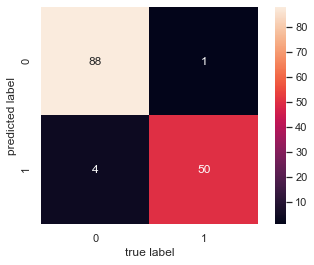

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        92
           1       0.93      0.98      0.95        51

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



__Radio Basis Function Kernel (RBF Kernel)__

In [14]:
clf = SVC(kernel='rbf', random_state=0,gamma=0.001).fit(X_train, y_train)

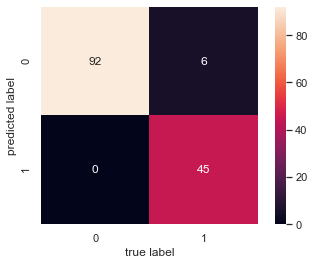

In [15]:
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        92
           1       1.00      0.88      0.94        51

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



### Cross-Validation

We are going to use the method of **training, validation and testing** also **called cross-validation**. 

<div>
<img src="Images/gen_cross_strategy.png" width="500"/>
</div>
In order to apply the cross-validation method, we are going to split  the data into k (10) subsets, and train on k-1 (9) one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

<div>
<img src="Images/grid_search_cross_validation.png" width="500"/>
</div>

There exists multiple cross-validation strategies, since our dataset can be considered balanced, we are going to apply the  Independent and Identically Distributed (i.i.d.) strategy, that makes the assumption that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples. The cross-validation method that we are going to apply is the **ShuffleSplit** , this iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

In [17]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),name=None):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    #print("Mean accuracy of {}:{}".format(name,test_scores_mean))
    return plt,test_scores_mean


Mean accuracy of linear:[0.9254386  0.93421053 0.94561404 0.94824561 0.95263158]
Mean accuracy of rbf:[0.71578947 0.89912281 0.90789474 0.91578947 0.91315789]


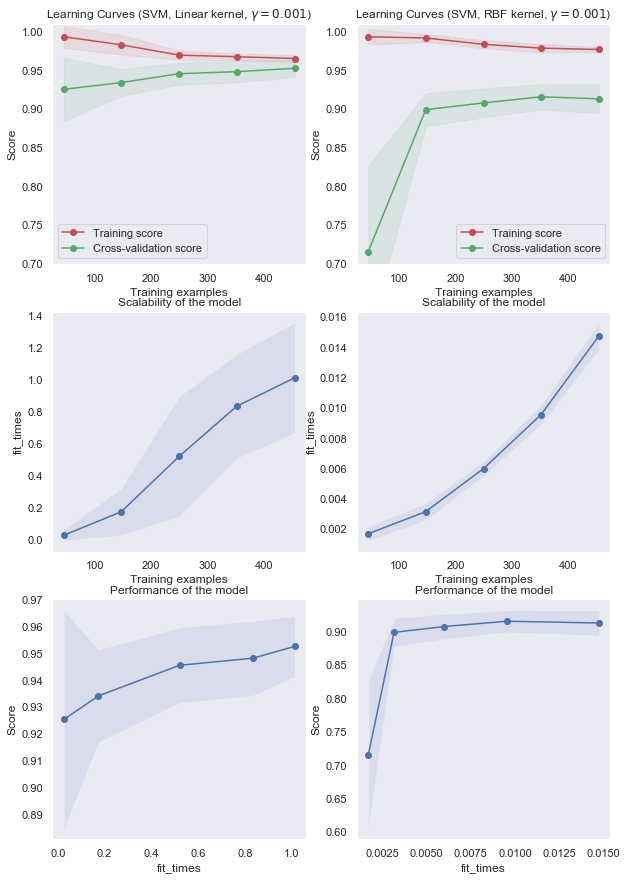

In [18]:

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #splitting strategy
estimator = SVC(kernel='linear',gamma=0.001)
acc_linear = plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4,name="linear") #n_jobs represent the number of parallel proccesses to use
print("Mean accuracy of linear:{}".format(acc_linear[-1]))
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='rbf',gamma=0.001)
acc_rbf=plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4,name="rbf")
#print(type(acc_rbf))
print("Mean accuracy of rbf:{}".format(acc_rbf[-1]))

On the past figures, we can see that In the first column, first row the learning curve of a  Support Vector Machines(Linear Kernel) classifier is shown for the Brest Cancer dataset. The Training error and the cross validation error of this model converges around the score of 0.95 for the linear kernel, which represent a really good approximation. However, the shape of the curve can be found in more complex datasets very often: the training score is very high at the beginning and decreases and the cross-validation score is very low at the beginning and increases. In the second column, first row we see the learning curve of an SVM with RBF kernel. We can see clearly that the training score is still around the maximum and the validation score could be increased with more training samples. 

Both kernel implementations suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is **overfitting**.

The plots in the second row show the times required by the models to train with various sizes of training dataset. The plots in the third row show how much time was required to train the models for each training sizes.

Optimum values of C and Gamma can be found by usin the method Gridsearch that the library sklearn provides.

Since we are going to consider the __linear__ and __RBF__(Radial basis function) kernels for the SVM model, we are going to search the optimal value of C and Gamma for each kernel function.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernels = ['linear','rbf']
param_grid = dict(gamma=gamma_range, C=C_range)
cv1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for kernel in kernels:
    grid = GridSearchCV(SVC(kernel=kernel), param_grid=param_grid, cv=cv1)
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.2f with kernel: %s"
          % (grid.best_params_, grid.best_score_,kernel))

The best parameters are {'C': 10.0, 'gamma': 1e-09} with a score of 0.96 with kernel: linear
The best parameters are {'C': 10000000000.0, 'gamma': 1e-08} with a score of 0.97 with kernel: rbf


### References
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
2. https://www.dataquest.io/blog/learning-curves-machine-learning/
3. https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine
4. https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
5. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

## 2. Naive Bayes
Naive Bayes classifiers are built on Bayesian classification methods. These methods rely on Bayes's theorem, which is an equation describing the **relationship of conditional probabilities of statistical quantities**. In Bayesian classification, the main interest is in finding the probability of a label given some observed features, which we can be written as P(L | features).
Bayes theorem express the following:

$P(L | \text { features })=\frac{P(\text { features } | L) P(L)}{P(\text { features })}$
Where:


*   P(L): the probability of label L being true (regardless of the data)   This is known as the prior probability of L.
*   P(features): the probability of the features (regardless of the label). This is known as the prior probability.
*   P(L|features): the probability of label L given the features(data). This is known as posterior probability.
*   P(features| L): the probability of features given that the label L was true. This is known as posterior probability.



$\frac{P\left(L_{1} | \text { features }\right)}{P\left(L_{2} | \text { features }\right)}=\frac{P\left(\text { features } | L_{1}\right)}{P\left(\text { features } | L_{2}\right)} \frac{P\left(L_{1}\right)}{P\left(L_{2}\right)}$

Advantages: 

* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters

When to use Naive Bayes ?

* When faster prediction is required. It also works well in multiclass predictions
* When the Naive assumption holds true, the classifier performs better compared to other models like logistic regression, and you need less training data.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

### Model Validation
On this section we will show the implementation of 2 popular validation techniques.
1. Hold Out Validation
2. Cross-Validation

### Hold Out Validation

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  1]
 [ 7 49]]


In [23]:
from sklearn import metrics
print("Accuracy of Naives Bayes Model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Naives Bayes Model: 0.9440559440559441


It is possible to see that the accuracy of naive bayes based on gaussian naive Bayes classifier, under the assumption is that data from each label is **drawn from a simple Gaussian distribution**, is higher than the accuracy of SVM.

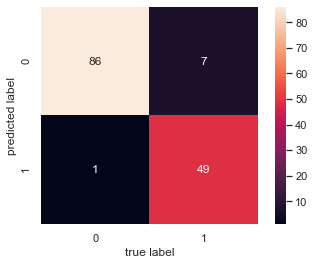

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.98      0.88      0.92        56

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



### Cross-Validation

Mean accuracy of linear:[0.93754386 0.93824561 0.93912281 0.93824561 0.93947368]


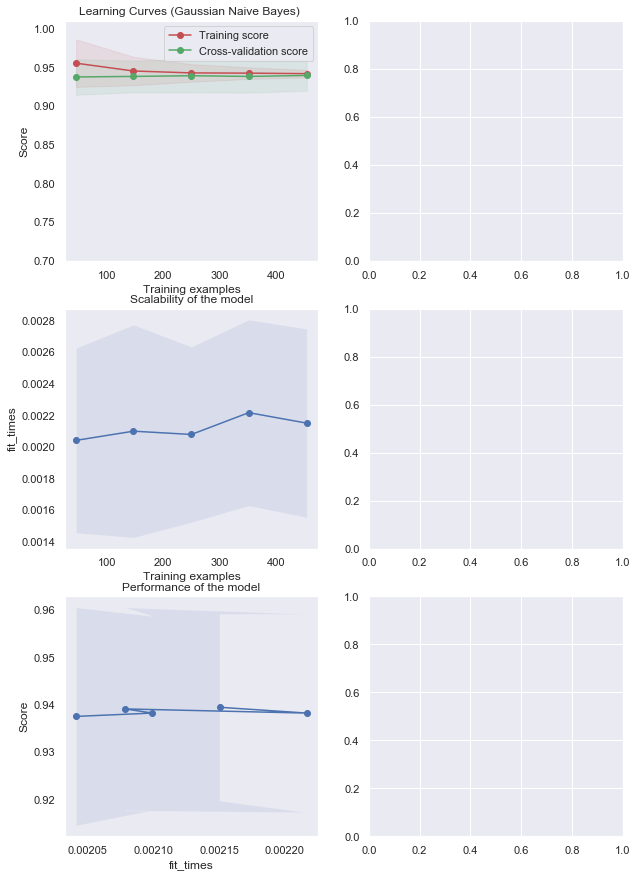

In [26]:

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Gaussian Naive Bayes) "
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0) #splitting strategy
estimator = GaussianNB()
gauss_nb = plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4,name="Gaussian NB") #n_jobs represent the number of parallel proccesses to use
print("Mean accuracy of linear:{}".format(gauss_nb[-1]))


## 3. Multilayer Perceptron

Neural Networks are used to solve artificial intelligence problems. Sometimes they outperform traditional machine learning models because they have the advantages of non-linearity, variable interactions, and a lot of costumizability. 
As a ANN classificator we are going to use a multi-layer perceptron.
A **multilayer perceptron (MLP)** is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to refer to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).
![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/05/Neuron.png)
__Multi-layer Perceptron (MLP)__ is a supervised learning algorithm that learns a function $f(\cdot): R^{m} \rightarrow R^{o}$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X=x_{1}, x_{2}, \ldots, x_{m}$ and a target $y,$ it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The next figure shows a one hidden layer MLP with scalar output.
<div>
<img src="Images/multilayerperceptron_network.png" width="400"/>
</div>


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Holdout validation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

The first 2 lines create arrays of the independent (X) and dependent (y) variables, respectively. The third line **splits the data into training and test dataset**, and the fourth line prints the shape of the training and the test data.

Normalize data

In [29]:

X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In this step, we will build the neural network model using the scikit-learn library's estimator object, 'Multi-Layer Perceptron Classifier'. The first line of code (shown below) imports 'MLPClassifier'. 

**Adam** can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters.Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.

$m_{n}=E\left[X^{n}\right]$

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

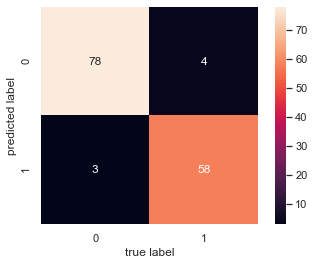

In [32]:
mat = confusion_matrix(y_test, predict_test) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        81
           1       0.95      0.94      0.94        62

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Cross-Validation

For know we were using the values of neurons to 30 and the value of hidden layer to 3 (30,30,30), these values were borrowed from a  previous analysis made on the same dataset on kaggle. We are going to see know how applying cross validiation and see the plot of the learning curve can help us determining the __optimal__ number of layers and neurons

In [34]:
def plt_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt, test_scores_mean

In the following cell, we start the analysis of cross validation using a single hidden layer and 30 neuros for that layer. We can see that this models suffers from high variance and low bias during the beggining of the training for a small portion of the dataset(100) after this the variance decreases and the model start converging to the the training score, that tell us the data is linearly separable.

Mean accuracy of MLP:[0.39889769 0.45328365 0.79804378 0.9279615  0.92788387]


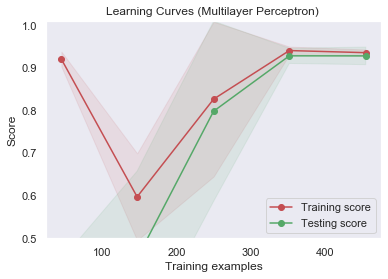

In [35]:


title = "Learning Curves (Multilayer Perceptron) "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #splitting strategy
estimator = MLPClassifier(hidden_layer_sizes=(30,), activation='relu', solver='adam', max_iter=500)
mlp_ac = plt_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01),
                     n_jobs=4) #n_jobs represent the number of parallel proccesses to use
print("Mean accuracy of MLP:{}".format(mlp_ac[-1]))


As we add another hidden layer to the model with 30 neurons, we see that no significant change is present. The model still suffers from high variance.

Mean accuracy of MLP:[0.43749418 0.59188014 0.91210992 0.93143922 0.92620711]


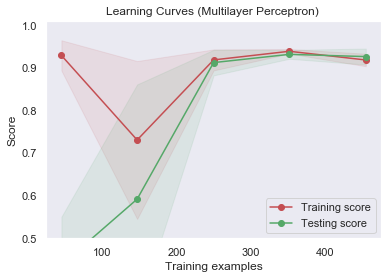

In [36]:

title = "Learning Curves (Multilayer Perceptron) "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #splitting strategy
estimator = MLPClassifier(hidden_layer_sizes=(30,30), activation='relu', solver='adam', max_iter=500)
mlp_ac = plt_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01),
                     n_jobs=4) #n_jobs represent the number of parallel proccesses to use
print("Mean accuracy of MLP:{}".format(mlp_ac[-1]))


When we have a total of 3 hidden layers with 30 neuros each one, we can see that the variance decreases and also  the training score converges to the cross-validation score(testing score). This is the best approach for this model.

Mean accuracy of MLP:[0.4848626  0.70065207 0.92612948 0.92442167 0.92089738]


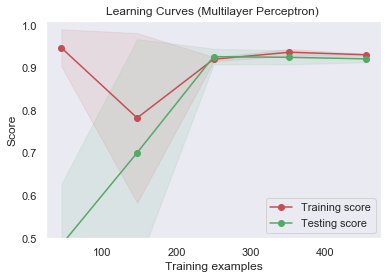

In [37]:

title = "Learning Curves (Multilayer Perceptron) "

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #splitting strategy
estimator = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=500)
mlp_ac = plt_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01),
                     n_jobs=4) #n_jobs represent the number of parallel proccesses to use
print("Mean accuracy of MLP:{}".format(mlp_ac[-1]))


### References

1. https://scikit-learn.org/stable/modules/neural_networks_supervised.html
2. https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn
3. http://www.ee.bgu.ac.il/~boaz/learning%20curves%20and%20optimization.pdf

# Conclussions

# 2) **Classification - Synthetic datasets**

A synthetic dataset is a repository of data that is generated artificiallly, menaning that is not collected by doing a survey or experiment.

## 1. Support Vector Machines

In [888]:
from sklearn.datasets import make_moons, make_circles, make_classification,make_gaussian_quantiles

In [889]:
h = .02
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

In [890]:
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]
names = [ "Linear SVM", "RBF SVM"]


In [891]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.4, random_state=0),
            make_circles(noise=0.3, factor=0.5, random_state=1),
            linearly_separable
            ]


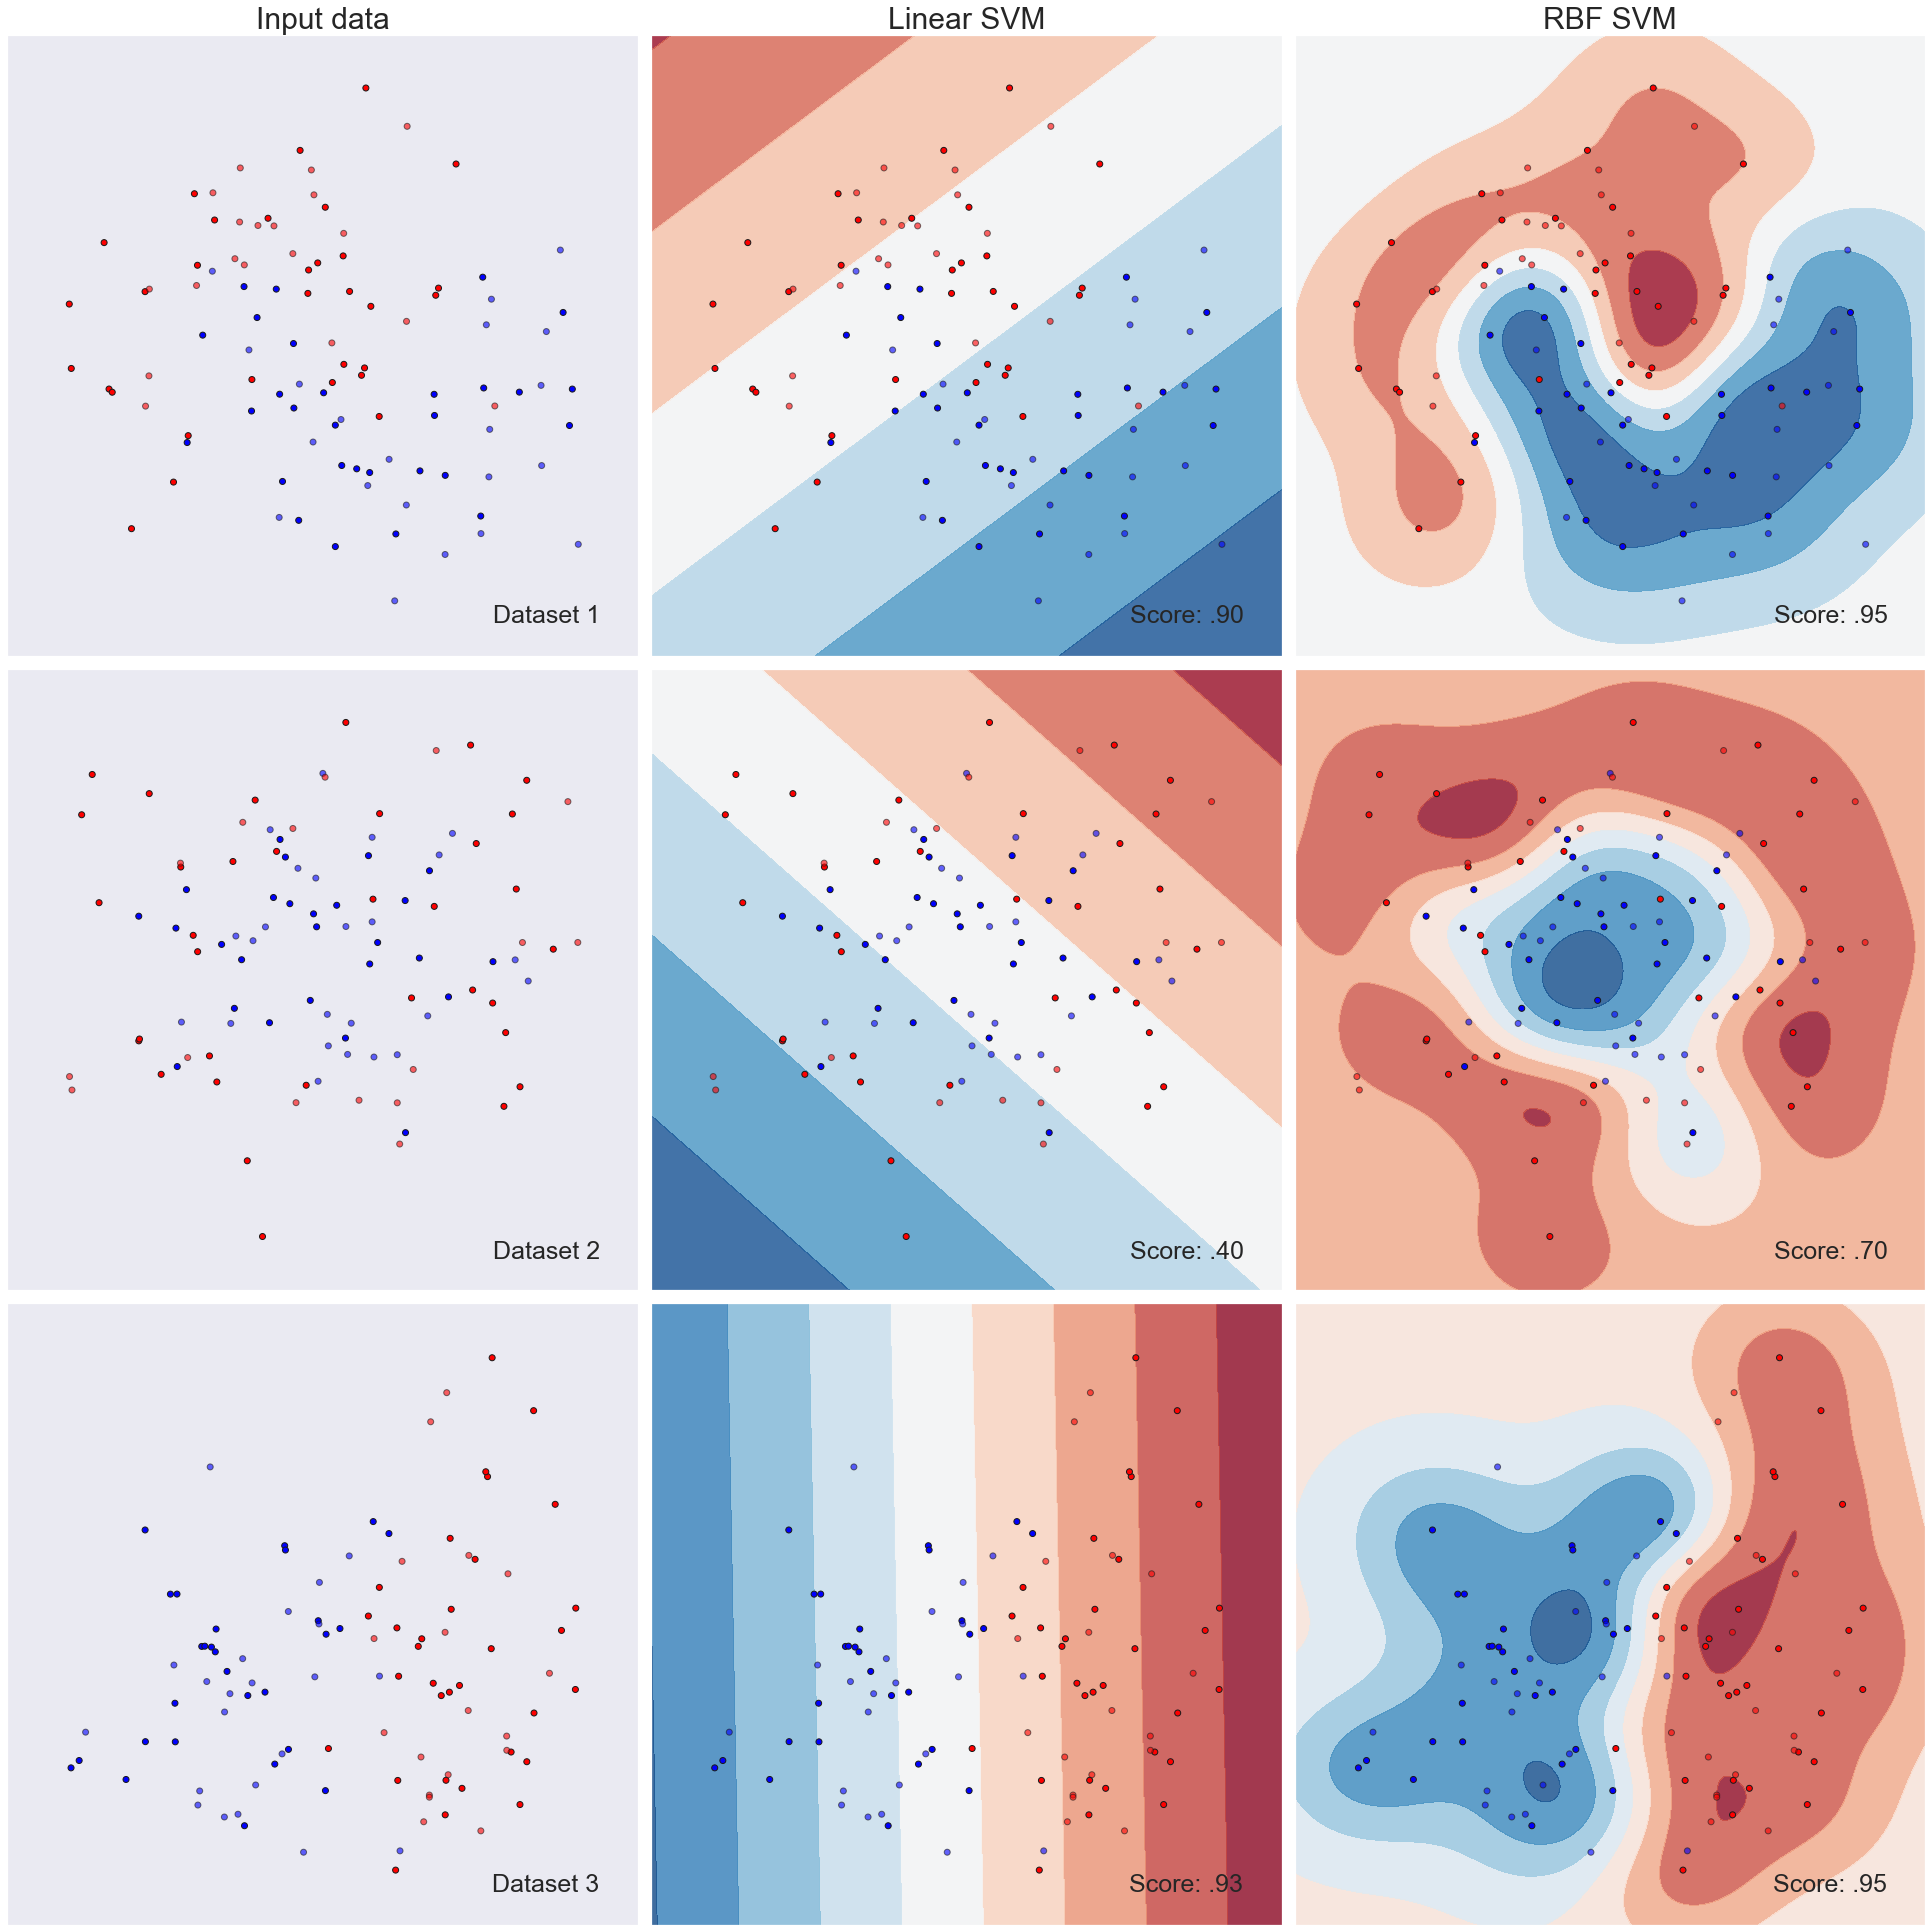

In [892]:
figure = plt.figure(figsize=(27, 27))
i=1
j=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",fontsize=30)
    ax.text(xx.max() - .3, yy.min() + .3, "Dataset {}".format(j),
                                size=25, horizontalalignment='right')
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize=30)
        ax.text(xx.max() - .3, yy.min() + .3, 'Score: '+('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right')
        i += 1
    j += 1
plt.tight_layout()
plt.show()


In [893]:
i=1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)
        cm = confusion_matrix(y_test, predict_test)
        print("Dataset {} :Confussion Matrix of {} is: \n {}".format(i,name,cm))
        print("Dataset {} :Classification report of {} is: \n {}".format(i,name,classification_report(y_test,predict_test)))
    i+=1

Dataset 1 :Confussion Matrix of Linear SVM is: 
 [[17  2]
 [ 2 19]]
Dataset 1 :Classification report of Linear SVM is: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.90      0.90        21

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

Dataset 1 :Confussion Matrix of RBF SVM is: 
 [[18  1]
 [ 1 20]]
Dataset 1 :Classification report of RBF SVM is: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      0.95      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Dataset 2 :Confussion Matrix of Linear SVM is: 
 [[16  0]
 [24  0]]
Dataset 2 :Classification report of Linear

C:\Users\erick\.conda\envs\INFO-F422\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Naive Bayes

In [894]:
classifiers = [
   GaussianNB()]
names = [ "Naive Bayes"]

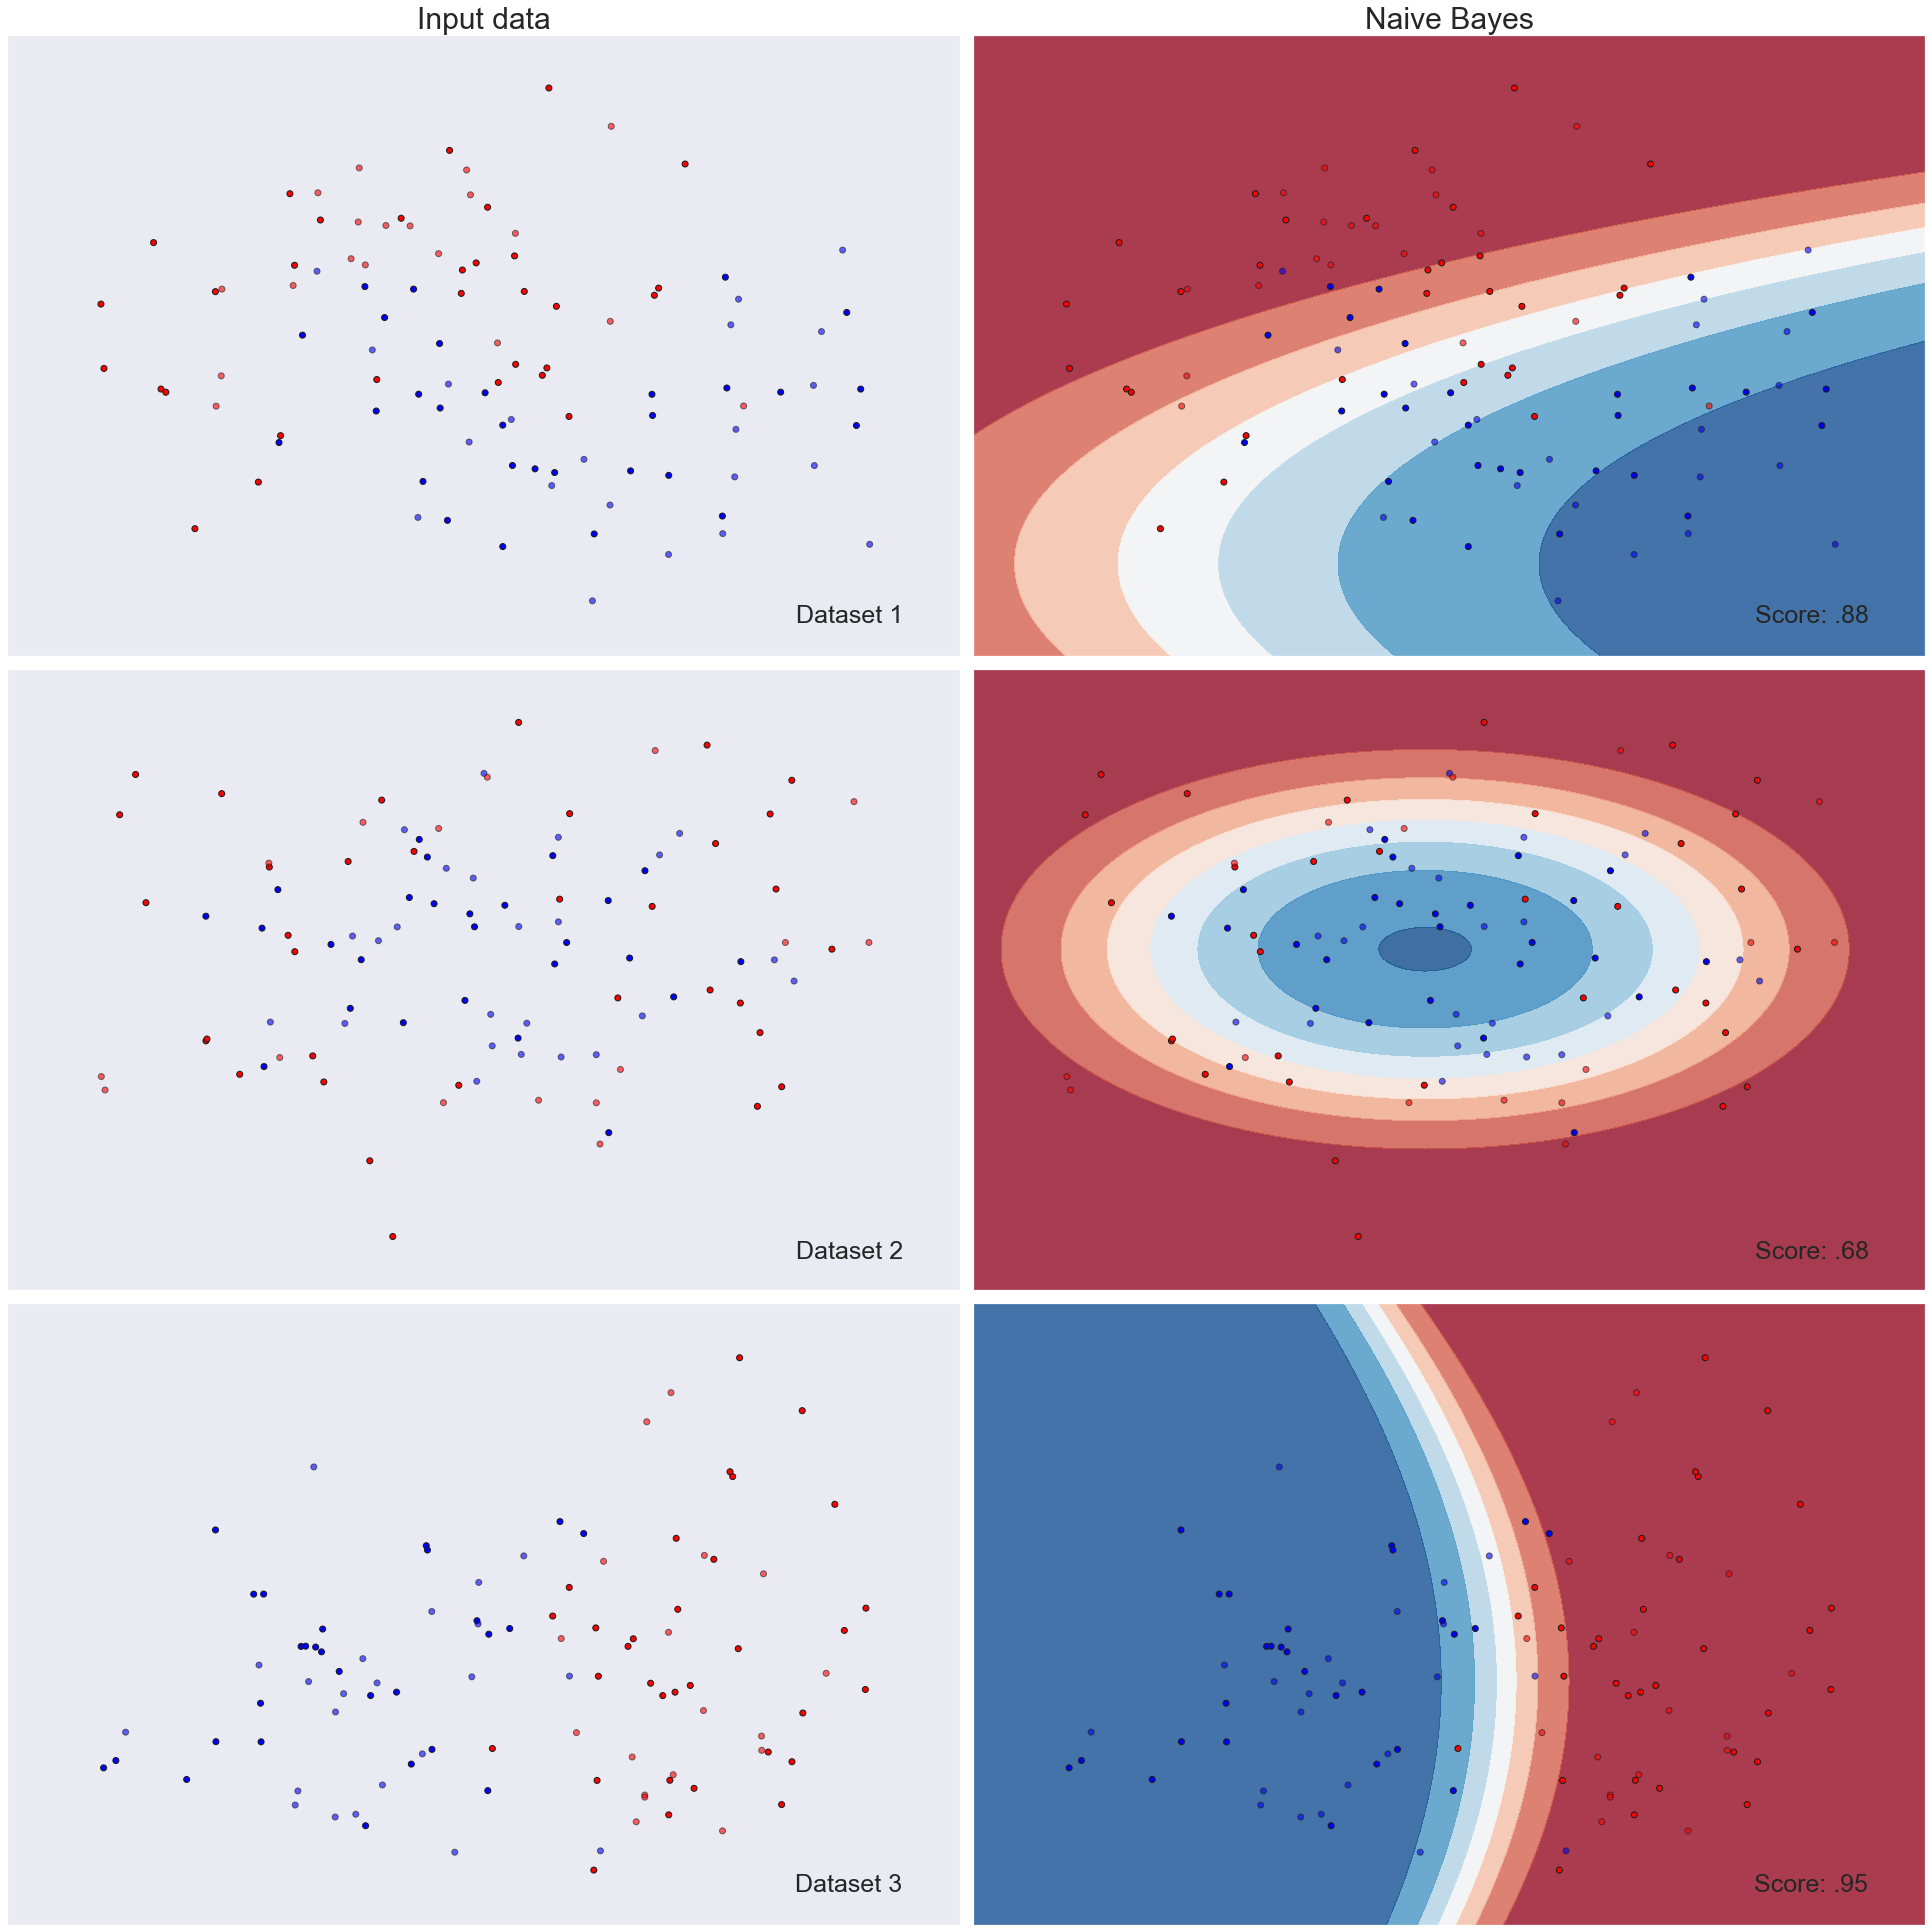

In [895]:
figure = plt.figure(figsize=(27, 27))
i=1
j=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",fontsize=30)
    ax.text(xx.max() - .3, yy.min() + .3, "Dataset {}".format(j),
                                size=25, horizontalalignment='right')
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize=30)
        ax.text(xx.max() - .3, yy.min() + .3, 'Score: '+('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right')
        i += 1
    j += 1
plt.tight_layout()
plt.show()

In [896]:
i=1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        predict_train = clf.predict(X_train)
        predict_test = clf.predict(X_test)
        cm = confusion_matrix(y_test, predict_test)
        print("Dataset {} :Confussion Matrix of {} is: \n {}".format(i,name,cm))
        print("Dataset {} :Classification report of {} is: \n {}".format(i,name,classification_report(y_test,predict_test)))
    i+=1

Dataset 1 :Confussion Matrix of Naive Bayes is: 
 [[17  2]
 [ 3 18]]
Dataset 1 :Classification report of Naive Bayes is: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.90      0.86      0.88        21

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40

Dataset 2 :Confussion Matrix of Naive Bayes is: 
 [[16  0]
 [13 11]]
Dataset 2 :Classification report of Naive Bayes is: 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       1.00      0.46      0.63        24

    accuracy                           0.68        40
   macro avg       0.78      0.73      0.67        40
weighted avg       0.82      0.68      0.66        40

Dataset 3 :Confussion Matrix of Naive Bayes is: 
 [[18  0]
 [ 2 20]]
Dataset 3 :Classification repor

## 3. Multilayer Perceptron

Number of layers = 100

In [140]:
classifiers = [
   MLPClassifier(alpha=1,solver='sgd' ,max_iter=1000),
   MLPClassifier(alpha=1,solver='lbfgs' ,max_iter=1000),
   MLPClassifier(alpha=1,solver='adam' ,max_iter=1000)]
names = [ "MLP-SGD","MLP-L-BFGS","MLP-Adam"]


NameError: name 'MLPClassifier' is not defined

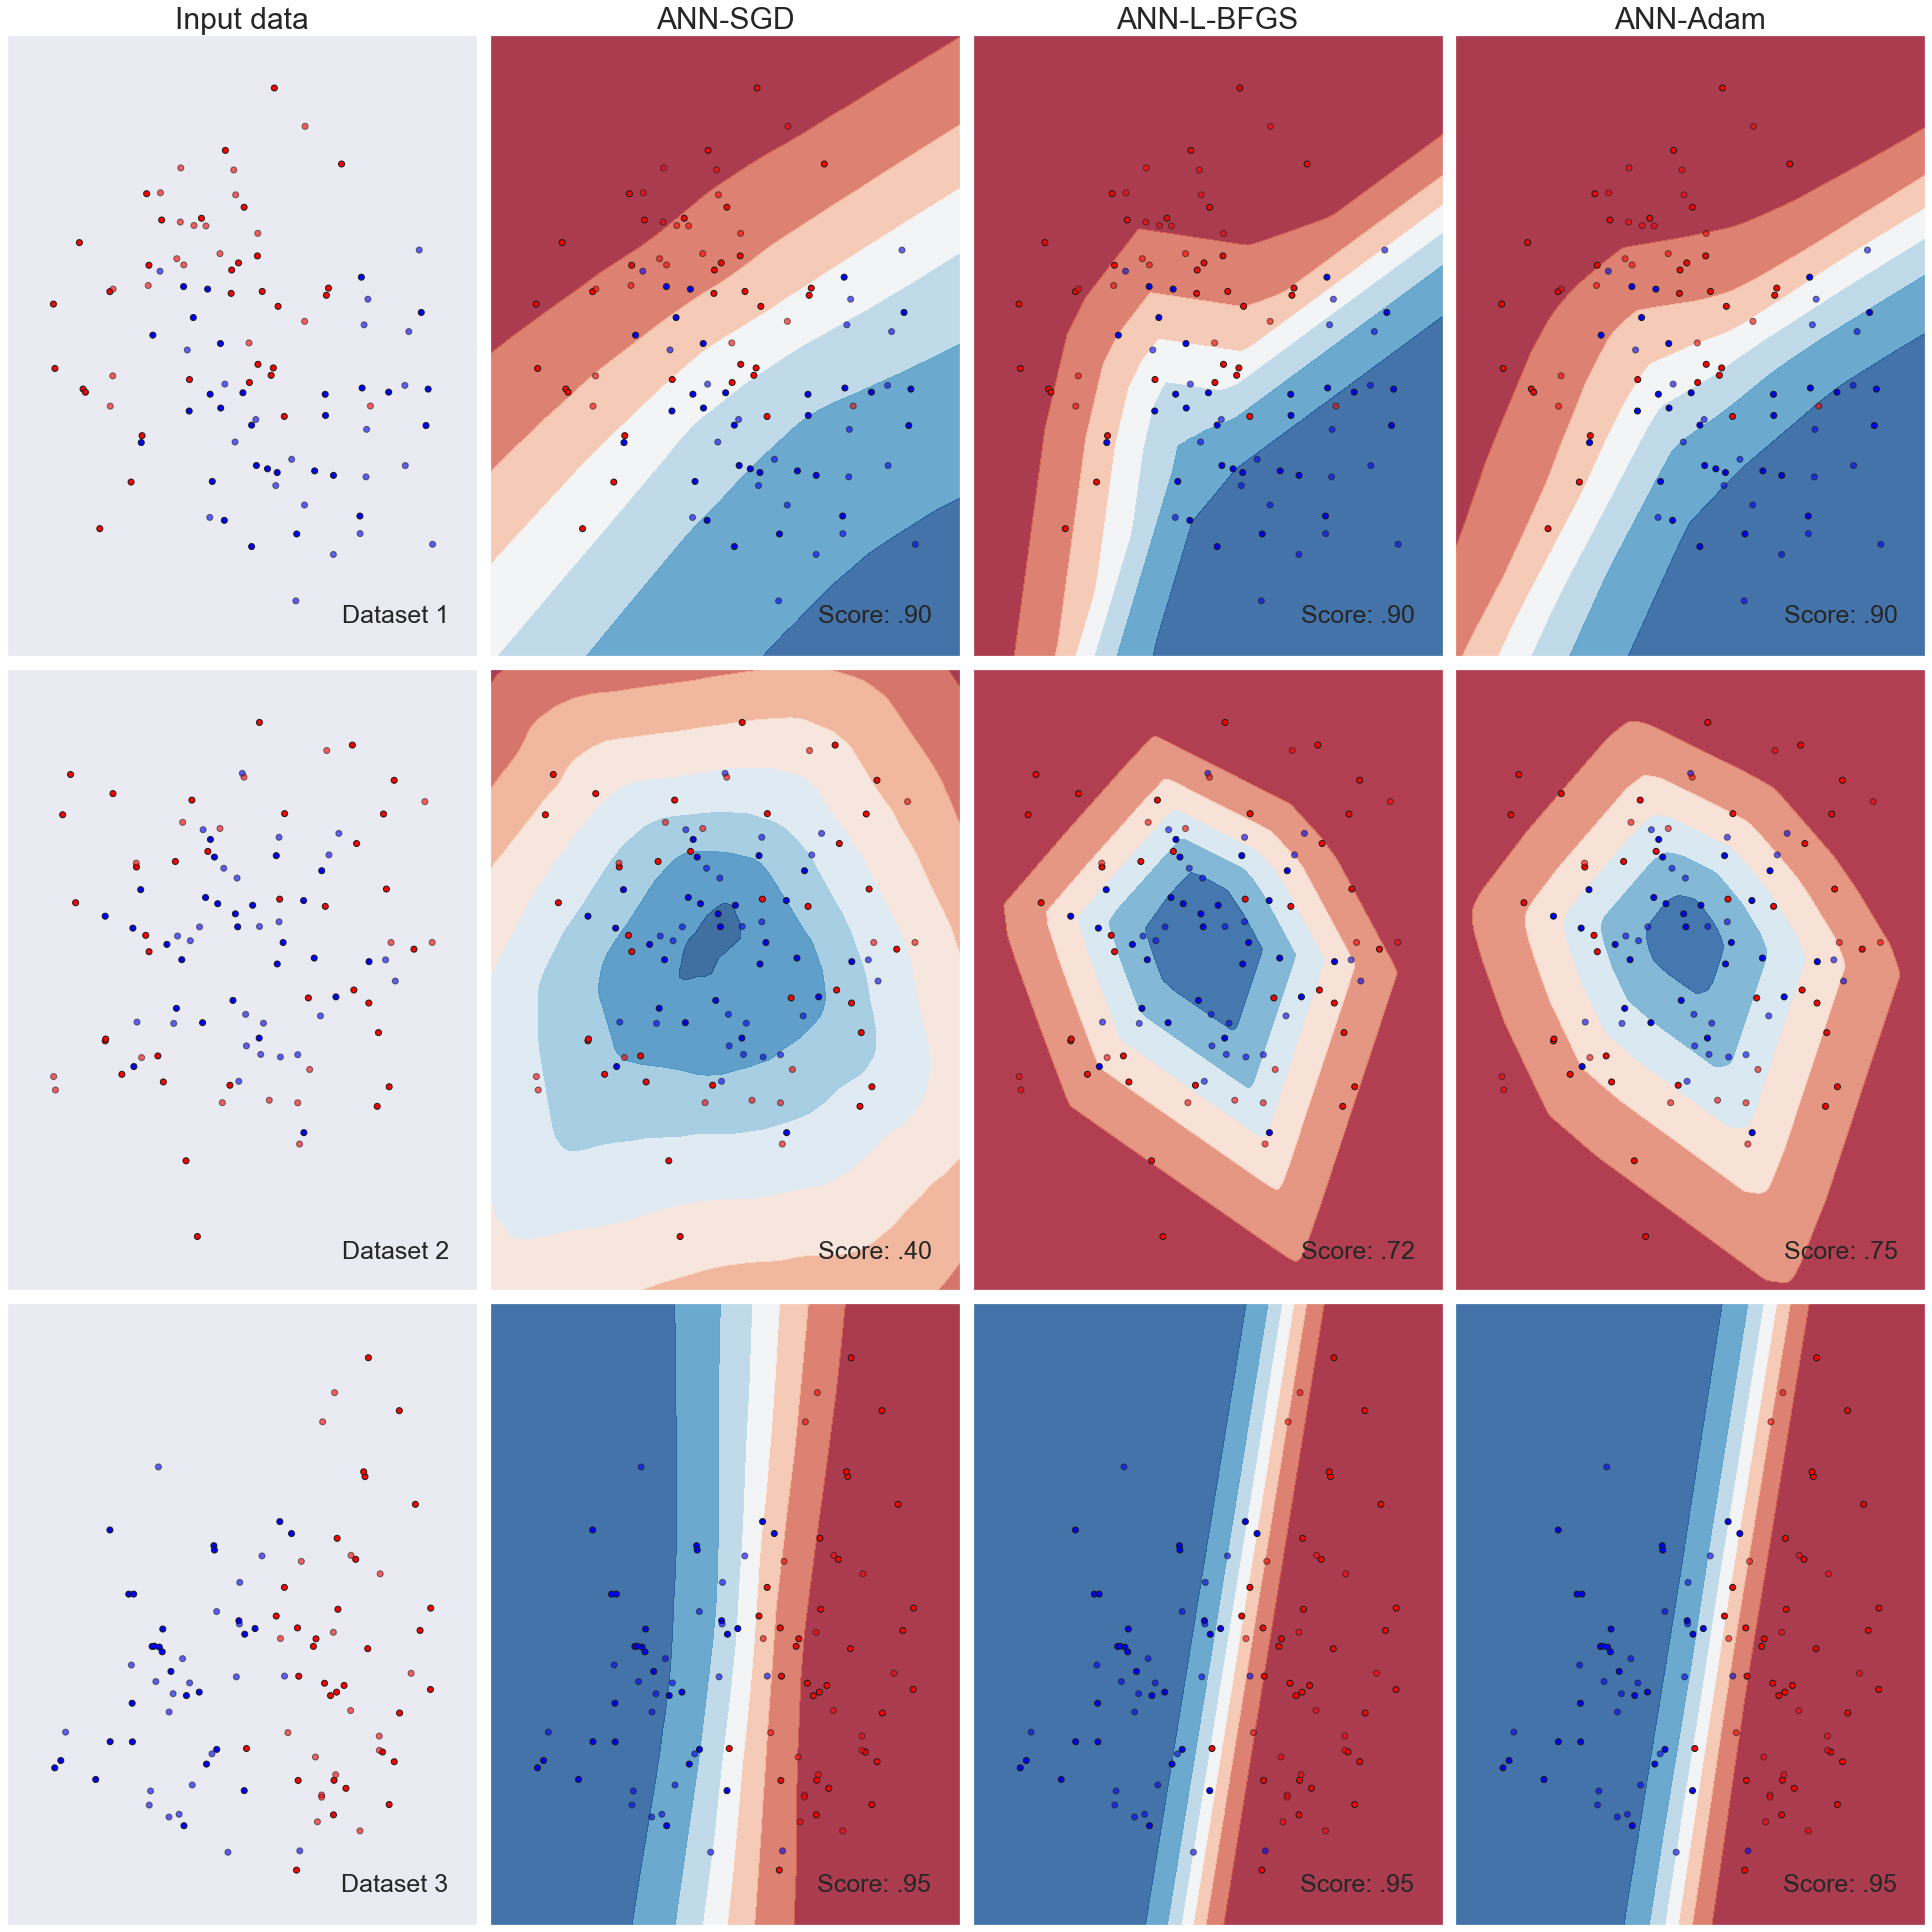

In [898]:
figure = plt.figure(figsize=(27, 27))
i=1
j=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",fontsize=30)
    ax.text(xx.max() - .3, yy.min() + .3, "Dataset {}".format(j),
                                size=25, horizontalalignment='right')
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize=30)
        ax.text(xx.max() - .3, yy.min() + .3, 'Score: '+('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right')
        i += 1
    j += 1
plt.tight_layout()
plt.show()

Activation:
* Logistic - the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* tanh -  the hyperbolic tan function, returns f(x) = tanh(x)
* relu - the rectified linear unit function, returns f(x) = max(0, x)

In [899]:
classifiers = [
   MLPClassifier(alpha=1,solver='adam' ,activation='logistic',max_iter=1000),
   MLPClassifier(alpha=1,solver='adam' ,activation='tanh',max_iter=1000),
   MLPClassifier(alpha=1,solver='adam' ,activation='relu',max_iter=1000)]
names = [ "ANN-Sigmoid","ANN-tanh","ANN-RELU"]


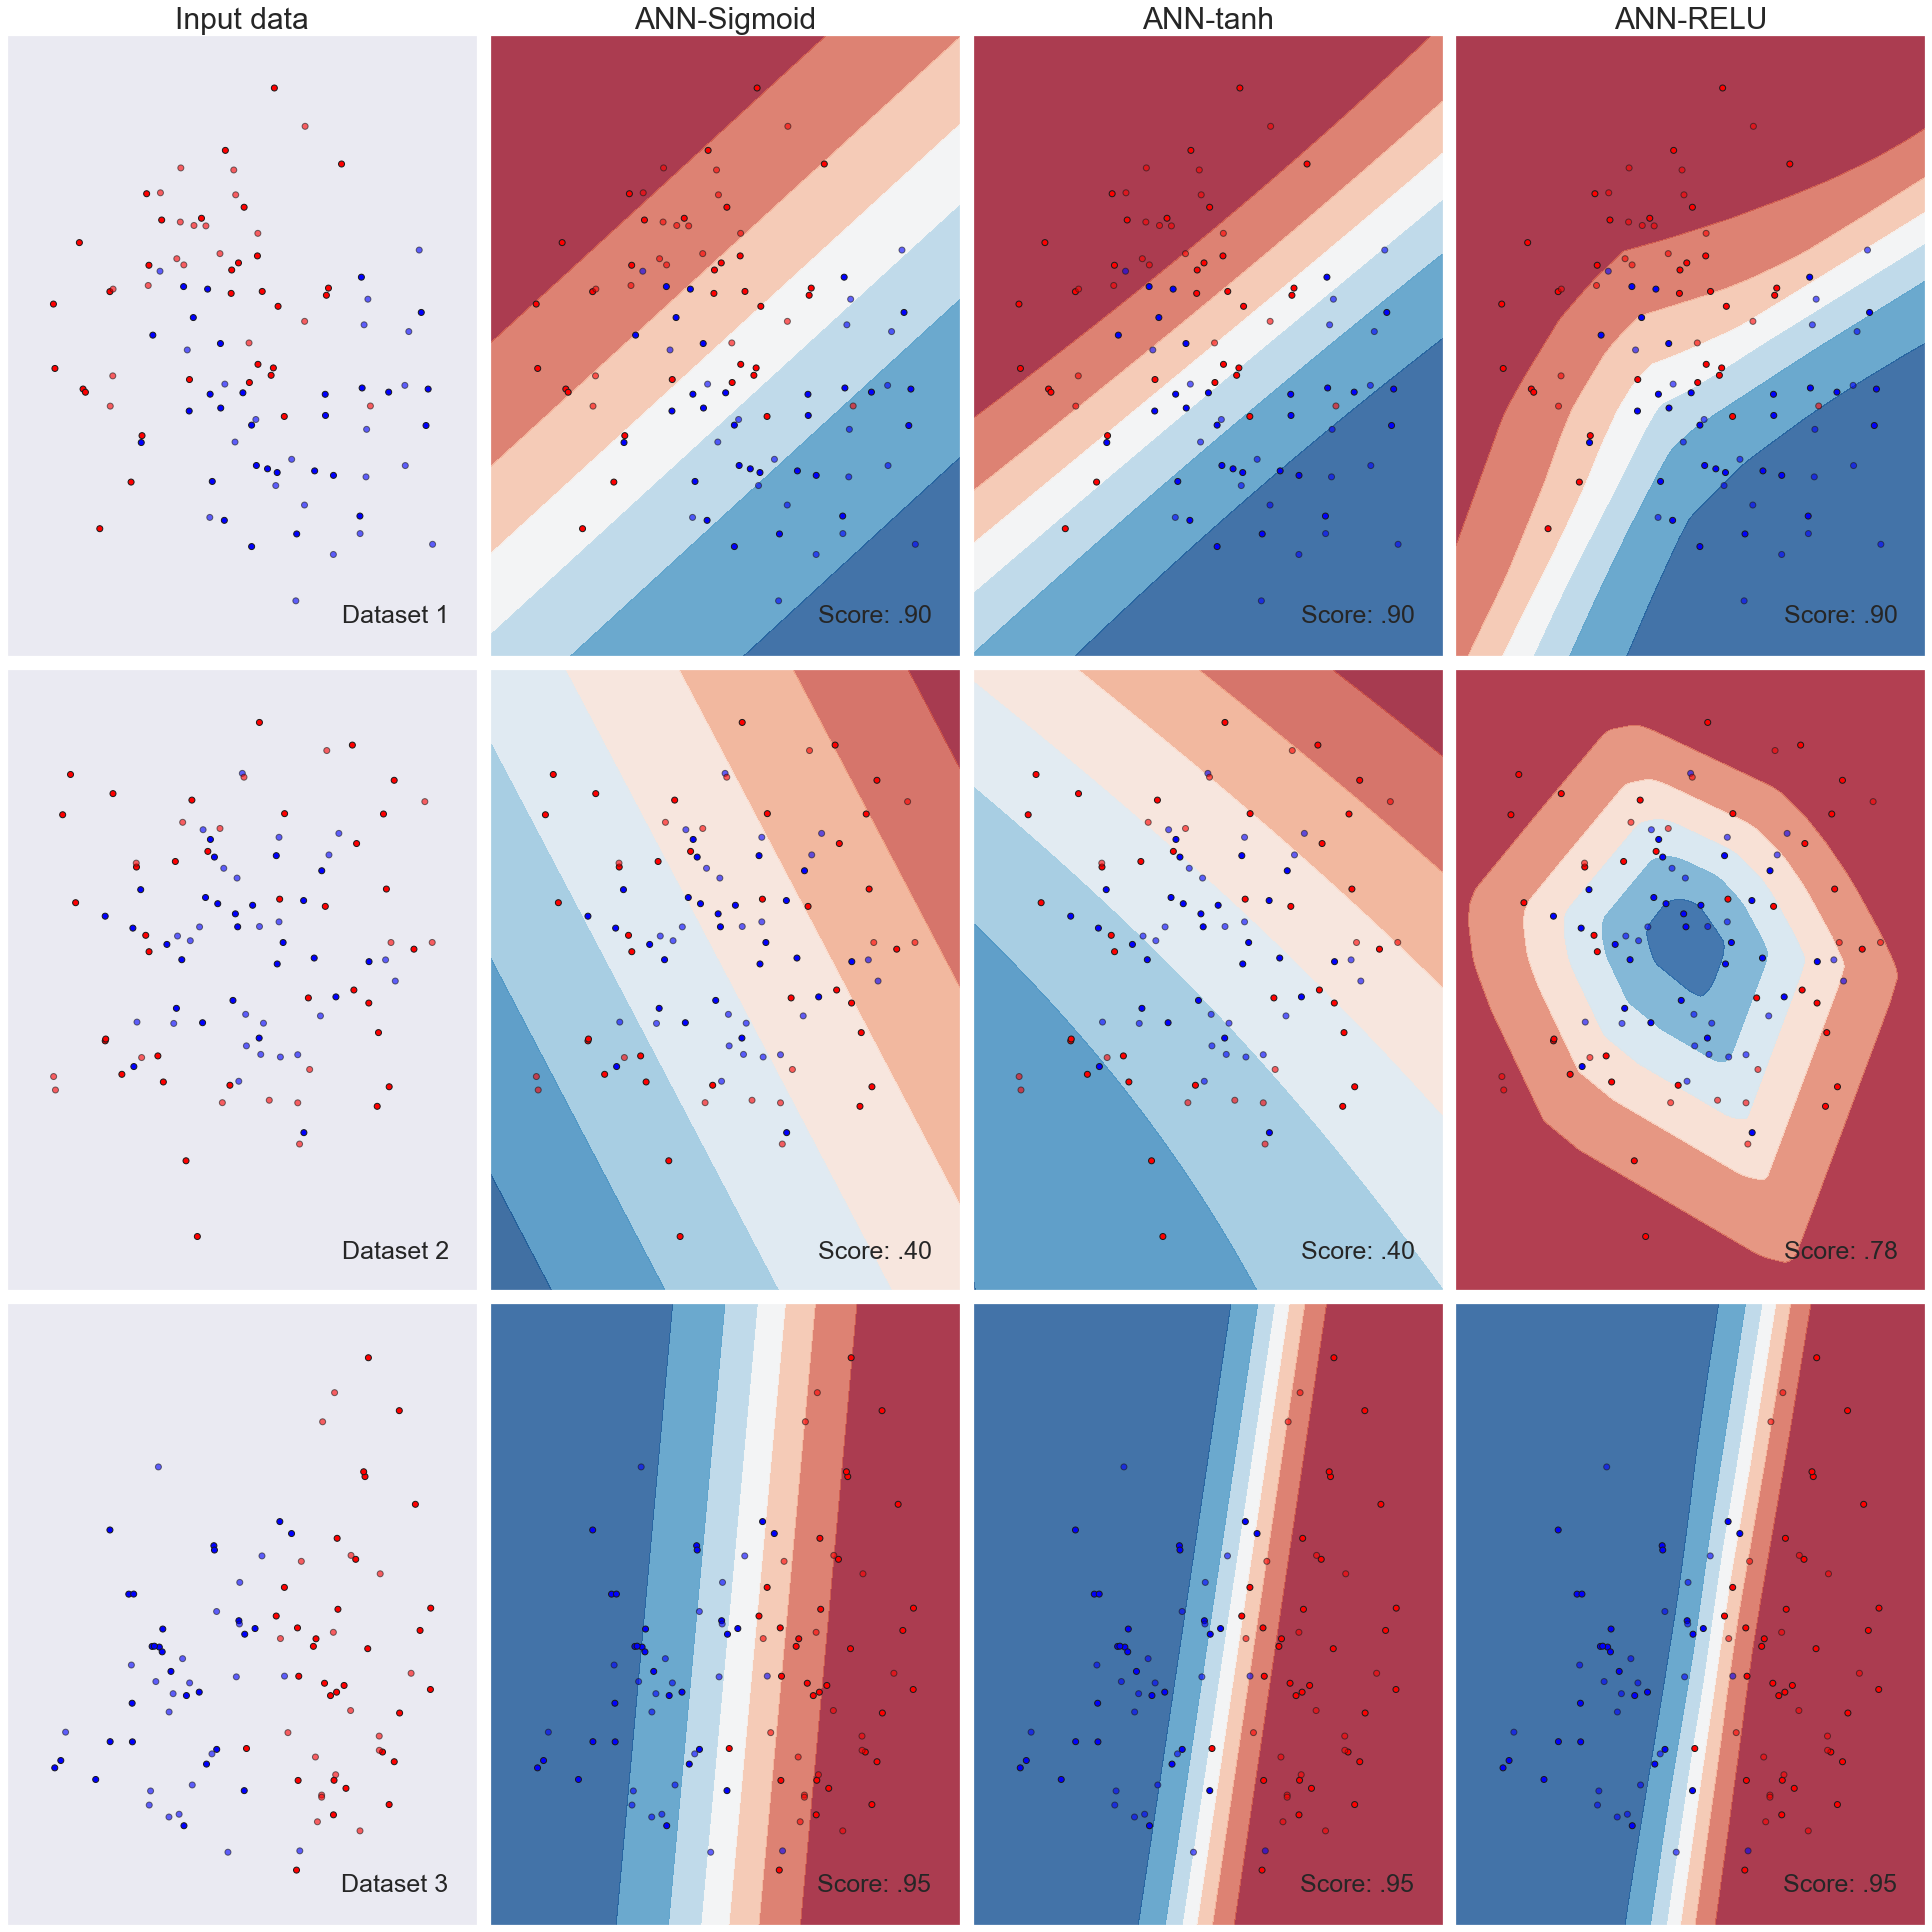

In [900]:
figure = plt.figure(figsize=(27, 27))
i=1
j=1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",fontsize=30)
    ax.text(xx.max() - .3, yy.min() + .3, "Dataset {}".format(j),
                                size=25, horizontalalignment='right')
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,fontsize=30)
        ax.text(xx.max() - .3, yy.min() + .3, 'Score: '+('%.2f' % score).lstrip('0'),
                size=25, horizontalalignment='right')
        i += 1
    j += 1
plt.tight_layout()
plt.show()